In [12]:
from IPython.display import IFrame
from IPython.display import HTML
from IPython.display import Image

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import random
import sys
import numpy as np

https://github.com/awesomedata/awesome-public-datasets

In [3]:
#import this

In [4]:
#import antigravity

In [5]:
#from __future__ import braces

<CENTER>
<div style=width:600px;border-radius:10px;height:200px;background-color:#ffcccc;text-align:center;vertical-align:middle;line-height:200px> 
<font size=14, font color=navy>Programmation
</div>
</CENTER>

## <center> K PLUS PROCHES VOISINS (k-NN - nearest neighbours)</center>

### Données
* Ensemble de vecteurs/points à coordonnées numériques    
$\rightarrow$ Liste $L$ (l'ensemble) de listes numériques ($\approx$ point) <i>de même taille</i> $n$.
* A chaque point est associée une caractéristique    
$\rightarrow$ ou entier naturel $\in [\! | 0, N-1|\! ]$    
$\rightarrow$ ou valeur numérique continue

### Méthode d'apprentissage supervisé.
* Prévoir des résultats (sur un corpus de test)
* A partir de données (corpus d'apprentissage)

Concrètement :
* Soit x de taille $n$ un <i>nouveau</i> point
* On cherche <b>statistiquement</b> la caractéristique la plus probable de $x$    
$\rightarrow$ en cherchant les $k\in \mathbb{N}^\star$ plus proches voisins de $x$    
$\rightarrow$ en déterminant :
    * la caractéristique la plus représentée (le mode des voisins)
    * la moyenne des valeurs pour une régression (la moyenne des voisins)
$\rightarrow$ on l'associe à $x$

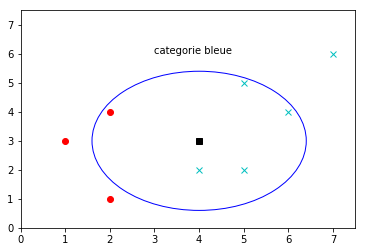

In [90]:
plt.close()
L1x=[1,2,2]
L1y=[3,1,4]
L2x=[4,5,6,7,5]
L2y=[2,2,4,6,5]
cir=plt.Circle((4,3),2.4,color='b',fill=False)
ax=plt.gca()
ax.cla()
ax.set_xlim((0,7.5))
ax.set_ylim((0,7.5))
ax.plot(L1x,L1y,'ro')
ax.plot(L2x,L2y,'cx')
ax.plot([4],[3],'ks')
ax.add_artist(cir)
ax.text(3,6,'categorie bleue')
plt.show()

### Mesure de distance.
Soit $x=(x_1,\dots,x_n)$ et $y=(y_1,\dots, y_n)$ points de $\mathbb{R}^n$.
$${\rm d}(x,y)=\sqrt{\sum\limits_{k=1}^n (x_k-y_k)^2}=\sqrt{(x_1-y_1)^2+\dots +(x_n-y_n)^2}$$
$\rightarrow$ distance <i>euclidienne</i>    
$\rightarrow$ Autres distances : de Manhattan, de Hamming

In [ ]:
# Sous fonction : distance


In [13]:
def dist(x,y):
    """Entree : deux listes ou tuples. 
    Sortie : la distance entre les points représentés"""
    assert len(x)==len(y)
    return np.sqrt(sum([ (x[i]-y[i])**2 for i in range(len(x))]))

### Recherche des k plus proches voisins.
* k : paramètre 
* E : liste des $P\geq k$ points du corpus d'apprentissage
* C : liste (dans le même ordre) de leurs caractéristiques (parmi $[\!| 0, N-1|\! ]$)
* x : nouveau point de $\mathbb{R}^n$.

#### Heuristique :
* On parcourt la liste E en calculant à chaque fois la distance de $x$ à l'élément courant.
* On maintient à jour le liste Min des indices des $k$ plus proches voisins déjà parcourus.    
$\rightarrow$ Il vaut mieux les classer dans l'ordre croissant des distances
* A chaque étape, si la distance de $x$ à l'élément courant est inférieure à celle au dernier élément représenté dans Min :
    * On supprime le dernier élément de Min.
    * On insère l'indice courant dans Min à sa place
    
  $\rightarrow$ Pour ne pas recalculer les distances, on les stocke aussi dans Min.
* On initialise Min en insérant les couples (distance à $x$, indice)     
$\rightarrow$ par ordre croissant des distances    
$\rightarrow$ pour des indices de $[\!| 0, k-1|\! ]$    
$\rightarrow$ une fonction d'insertion est utile

In [ ]:
# A vous : insertion
def insere(elt,liste):

In [75]:
#Version non en place annulée
def insere(elt,liste):
    """Données : liste est homogène et triée,
    les éléments de même type que x,
    qui peuvent être comparés par <=
    Résultat : une liste comportant les élément des liste et x, triée"""
    n=len(liste)
    res=[]
    k=0
    while (k<n) and (liste[k]<=elt):
        res.append(liste[k])
        k+=1
    res.append(elt)
    if k<n:
        while(k<n):
            res.append(liste[k])
            k+=1
    return res
insere(3,[])

[3]

In [10]:
def insere(elt,L):
    k=len(L)
    L.append(elt)
    while (k>0) and (L[k-1]>L[k]):
        L[k-1],L[k]=L[k],L[k-1]
        k-=1

In [ ]:
# A vous

In [83]:
#Version non en place annulée
def proches_voisins(E,k,x):#On peut rajouter la distance en paramètre
    Min=[]
    for i in range(k):
        Min=insere((dist(E[i],x),i),Min)
    for j in range(k,len(E)):
        d=dist(x,E[j])
        if Min[-1][0]>d:
            Min.pop()
            Min=insere((d,j),Min)
    return Min

In [9]:
def proches_voisins(E,k,x):#On peut rajouter la distance en paramètre
    Min=[]
    for i in range(k):
        insere((dist(E[i],x),i),Min)#La distance en premier pour l'ordre lexicographique et qu'insere fonctionne
    for j in range(k,len(E)):
        d=dist(x,E[j])
        if Min[-1][0]>d:
            Min.pop()
            insere((d,j),Min)
    return Min

In [12]:
E=[(1,3),(2,1),(2,4),(4,2),(5,2),(6,4),(7,6),(5,5)]
C=[0,0,0,1,1,1,1,1]
x=(4,3)
proches_voisins(E,5,(4,3))

[(1.0, 3),
 (1.4142135623730951, 4),
 (2.23606797749979, 2),
 (2.23606797749979, 5),
 (2.23606797749979, 7)]

$\rightarrow$ Complexité linéaire

#### Heuristique plus simple
* On établit par simple parcours la liste des couples (distance à x,indice).
* On trie.
* On ne garde que le $k$ premiers éléments.

$\rightarrow$ Complexité quadratique ou en $O(n\ln(n))$

In [8]:
def proches_vois_complexe(E,k,x):
    M=[]
    for i in range(len(E)):
        M.append((dist(x,E[i]),i))
    M.sorted()
    return M[:k]

### Fonction finale.
* Détermination de :
    * la caractéristique majoritaire 
    * la valeur (moyenne à attribeur à la caractéristique de x
* Parmi les k plus proches voisins

In [ ]:
# A vous
def caracterise(x,E,k,C):

In [7]:
def caracterise(x,E,k,C):
    N=max(C)
    Ldecompte=[0 for i in range(N+1)]
    Voisins=proches_voisins(E,k,x)
    for elt in Voisins:
        d,i=elt#unpacking
        Ldecompte[C[i]]+=1
    car,val=0,Ldecompte[0]
    for i in range(len(Ldecompte)):#recherche de maximum
        num=Ldecompte[i]
        if num>val:
            car,val=i,num
    return car     

In [21]:
   
caracterise(x,E,5,C)

1

In [6]:
#C'est plus pratique et lisible avec un dictionnaire
def caracterise2(x,E,k,C):
    dico={}
    Voisins=proches_voisins(E,k,x)
    for elt in Voisins:
        d,i=elt
        dico[C[i]]=dico.get(C[i],0)+1#crée ce qu'il faut
    maxi,ind=-1,-1
    for elt in dico.keys():
        if dico[elt]>maxi:
            maxi,ind=dico[elt],elt
    return ind

In [113]:
caracterise2(x,E,5,C)

1

In [114]:
def regression(x,E,k,C):
    Voisins=proches_voisins(E,k,x)
    accu=0
    for elt in Voisins:
        d,i=elt
        accu+=C[i]
    return (1/float(k))*accu

#### Sur un exemple plus consistant

In [18]:
IFrame("./iris.jpg", width=300, height=250)

#### IRIS DE FISHER
* Ronald Fisher (ou Edgar Anderson), 1936
* Caractéristiques morphologiques $\leadsto$ Taxonomie des fleurs


* Fisher : analyse discriminante linéaire
* Aujourd'hui : modèle de <i>data mining</i> (fouille de données)

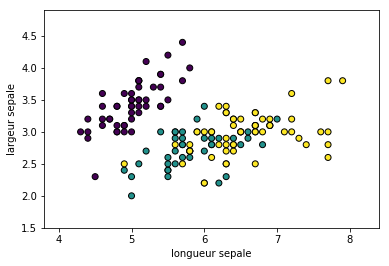

In [24]:
#iris de Fisher
from sklearn import datasets
iris = datasets.load_iris()
X,y = iris.data[:, :2],iris.target

x_min, x_max, y_min, y_max = X[:, 0].min() - .5, X[:, 0].max() + .5,X[:, 1].min() - .5, X[:, 1].max() + .5

plt.cla()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis,
            edgecolor='k')
plt.xlabel('longueur sepale')
plt.ylabel('largeur sepale')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
#plt.xticks(())
#plt.yticks(())
plt.show()

#### Petit focus sur les types et contenus

In [14]:
y,X

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1],
        [5.4, 3.7],
        [4.8, 3.4],
        [4.8, 3. ],
        [4.3, 3. ],
        [5.8, 4. ],
        [5.7, 4.4],
        [5.4, 3.9],
        [5.1, 3.5],
        [5.7, 3.8],
        [5.1, 3.8],
        [5.4, 3.4],
        [5.1, 3.7],
        [4.6, 3.6],
        [5.1, 3.3],
        [4.8

In [16]:
Noms=iris.target_names
Noms

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [23]:
Noms[caracterise(np.array([6,3]),X,8,y)]#Importants changements selon les valeurs de 1<=k<=7

'versicolor'

### Limites et solutions
* Bruit dans les classes
* Classe majoritaire en nombre    
$\rightarrow$ pondérations possibles    
$\rightarrow$ coefficients forts $\leftrightarrow$ proximité
* Choix de $k$ :
    * $k$ grand    
    $\rightarrow$ Moins sensible au bruit    
    $\rightarrow$ Adapté à un grand corpus d'apprentissage
    * $k$ petit :    
    $\rightarrow$ Structures fines    
    $\rightarrow$ Nécessaire pour des petits corpus d'apprentissage  
    
$\rightarrow$ Choix utilisateur/heuristique

### Fonctions intégrées
https://scikit-learn.org/stable/modules/neighbors.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* $\verb"scikit-learn"$
    * $\verb"sklearn.neighbors"$ (package)
    * $\verb"NearestNeighbors"$
    * $\verb"KNeighborsClassifier"$

In [32]:
from sklearn.neighbors import KNeighborsClassifier
E=[[1,3],[2,1],[2,4],[4,2],[5,2],[6,4],[7,6],[5,5]]
C=[0,0,0,1,1,1,1,1]
x=[4,3]
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(E, C)
neigh.predict(np.array(x).reshape(1,-1))

array([1])

## <center> ALGORITHMES GLOUTONS (Greedy)</center>

In [ ]:
#Sac a dos
#Rendu monnaie
#Voyageur de commerce : non optimalité

### Heuristique gloutonne :
* On ne revient pas sur ses choix    
$\rightarrow$ ce qui est mangé ne ressort pas
* Choix d'optimum local

### Ex : Rendu de monnaie
* Rendu de monnaie avec système de pièces :    
* <b>Heuristique gloutonne</b> : on rend à chaque étape la plus grosse pièce possible.
    * Système 1,2,5,10,20,50,100,200    
    $\rightarrow$ heuristique optimale.
    * Système 1,3,4    
    $\rightarrow$ 6=4+1+1 (glouton) 6=3+3 (optimal)

#### Données et résultat.
* Données : 
    * Système : Une liste $L$ d'entiers naturels non nuls triée (ordre croissant)    
    $\rightarrow$ Premier élément 1.    
    $\rightarrow$ Rendu toujours possible.
    * Quantité r à rendre : entier naturel non nul
* Résulat : liste de nombres    

* Faire un décompte jusqu'à 0
* Mémoriser la dernière pièce rendue     
$\rightarrow$ inutile de parcourir toute la liste L à chaque fois.

In [ ]:
# A vous

In [27]:
def rendu(r,L):
    decompte=r
    Rendu=[]
    repere=len(L)-1
    while (decompte>0):
        booleen=True
        while booleen:
            if decompte-L[repere]>=0:
                booleen=False
            else:
                repere-=1
        Rendu.append(L[repere])
        decompte-=L[repere]
    return Rendu
L=[1,2,5,10,20,50]
rendu(93,L)

[50, 20, 20, 2, 1]

### Ex : Problème du voyageur de commerce
* Parcourir $N$ villes/points une unique fois en minimisant la distance parcourue.    
* <b>Heuristique gloutonne</b> : on choisit à chaque étape la ville la plus proche du point actuel.    
$\rightarrow$ Connaître les distances    
$\rightarrow$ Distances de Manhattan, euclidienne    
$\rightarrow$ Tableau (bidimensionnel des distances)

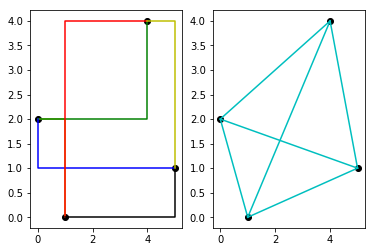

In [24]:
lx=[0,1,4,5]
ly=[2,0,4,1]

plt.subplot(121)
plt.scatter(lx,ly,c='k')
plt.plot([0,1,1],[2,2,0],'y');plt.plot([0,4,4],[2,2,4],'g');plt.plot([0,0,5],[2,1,1],'b');plt.plot([1,1,4],[0,4,4],'r');plt.plot([1,5,5],[0,0,1],'k');plt.plot([4,5,5],[4,4,1],'y');
plt.subplot(122)
plt.scatter(lx,ly,c='k')
plt.plot([0,1],[2,0],'c');plt.plot([0,4],[2,4],'c');plt.plot([0,5],[2,1],'c');plt.plot([1,4],[0,4],'c');plt.plot([1,5],[0,1],'c');plt.plot([4,5],[4,1],'c');
plt.show()

#### Données et résultat.
* Données : 
    * Matrice des distances : Une liste $Dist$ de $N$ listes à $N$ éléments    
    $\rightarrow$ $Dist[i][j]$ : distance de la ville $i$ à la ville $j$.    
    * Point de départ $orig$ (facultatif) : l'un des éléments de $[\! |0, N-1|\! ]$.
* Résulat : liste contenant une permutation de $[\! |0, N-1|\! ]$    
$\rightarrow$ Ordre de parcours (g$ \rightarrow$ d)   
$\rightarrow$ Possibilité de renvoyer aussi la distance parcourue.

* Sous-fonction donnant l'indice du plus proche voisin non visité    
$\rightarrow$ indice $cour$ de la position courante    
$\rightarrow$ Liste $Visites$    
$\rightarrow$ Matrice $Dist$
* Fonction principale    
$\rightarrow$ Remplit Visites    
$\rightarrow$ A partir de $[Orig]$.

In [ ]:
# A vous : + proche voisin non visite

In [28]:
def proche_vois_possible(cour,Dist,Visites):
    N=len(Dist)
    val=max(Dist[cour])
    ind=-1#changera toujours
    for i in range(N):
        if (Dist[cour][i]<=val) and (not i in Visites):#large important pour que ind change
            val,ind=Dist[cour][i],i
    return ind

In [27]:
# A vous : + court chemin

In [29]:
def court_chemin(orig,Dist):
    Visites=[orig]
    d=0
    N=len(Dist)
    while len(Visites)<N:
        i=proche_vois_possible(Visites[-1],Dist,Visites)
        d+=Dist[Visites[-1]][i]
        Visites.append(i)
    return Visites,d

In [30]:
Lpoints=[[0,2],[1,0],[4,4],[5,1]]
def deucl(x,y):
    n=len(x)
    assert n==len(y)
    return np.sqrt( sum([ (x[i]-y[i])**2 for i in range(n) ]))
def dman(x,y):
    n=len(x)
    assert n==len(y)
    return sum([abs(x[i]-y[i]) for i in range(n)] )
Dist1=[[ deucl(Lpoints[i],Lpoints[j]) for i in range(len(Lpoints))] for j  in range(len(Lpoints))]
Dist2=[[ dman(Lpoints[i],Lpoints[j]) for i in range(len(Lpoints))] for j  in range(len(Lpoints))]
Dist1,Dist2

([[0.0, 2.23606797749979, 4.47213595499958, 5.0990195135927845],
  [2.23606797749979, 0.0, 5.0, 4.123105625617661],
  [4.47213595499958, 5.0, 0.0, 3.1622776601683795],
  [5.0990195135927845, 4.123105625617661, 3.1622776601683795, 0.0]],
 [[0, 3, 6, 6], [3, 0, 7, 5], [6, 7, 0, 4], [6, 5, 4, 0]])

In [32]:
court_chemin(0,Dist1),court_chemin(0,Dist2)

(([0, 1, 3, 2], 9.5214512632858295), ([0, 1, 3, 2], 12))

* Non optimalité globale :
    * départ $(40,0)$
    * points de passage : $(0,0)$, $(30,0)$, $(70,0)$    
* Algorithme $(40,0)\rightarrow (30,0)\rightarrow (0,0)\rightarrow (70,0)$    
$\rightarrow$ distance 110
* Choix optimal : $(40,0)\rightarrow (70,0)\rightarrow (30,0)\rightarrow (0,0)$    
$\rightarrow$ distance 100

In [198]:
Lp=[[0,0],[0,30],[0,40],[0,70]]
Dist3=[[ dman(Lp[i],Lp[j]) for i in range(len(Lp))] for j  in range(len(Lp))]

In [201]:
court_chemin(2,Dist3)

([2, 1, 0, 3], 110)

### Ex : Problème du sac à dos
* Optimisation combinatoire sous contrainte.
* Sac à dos : poids maximal $P_{max}$. 
* Collection (ensemble fini) $\mathcal{C}$ d'objets     
$\rightarrow$ Poids (nombre)   
$\rightarrow$ Valeur (nombre)    
$\rightarrow$ $\mathcal{C}$ $\leftrightarrow$ Liste L de 2-uplets

* Problème (KP problem, comme "knappsack") : remplir le sac    
$\rightarrow$ Maximiser la valeur du contenu.    
$\rightarrow$ Sans dépasser $P_{max}$.

* Notation : pour  $c\in \mathcal{C}$ :    
$\rightarrow$ $v_c>0$ : valeur     
$\rightarrow$ $p_c>0$ : poids



* Recherche sous-collection $\mathcal{D}$ de $\mathcal{C}$ telle que :
    * $\sum\limits_{d\in \mathcal{D}} p_d\leq P_{max}$.
    * $\forall \mathcal{D}'\subset \mathcal{C}$ telle que $\sum\limits_{d'\in \mathcal{D}'} p_{d'}\leq P_{max}$ :$$ V_{\mathcal{D}'}=\sum\limits_{d'\in \mathcal{D}'} v_{d'} \leq \sum\limits_{d\in \mathcal{D}} v_{d}=V_{\mathcal{D}}$$

* $V_{\mathcal{D}'}$ $\leftrightarrow$ valeur de $\mathcal{D}'$

* <b>Heuristique gloutonne 1</b> :
    * On remplit à chaque étape par l'objet de plus grande valeur qui rentre    
    $\rightarrow$ analogue au rendu de monnaie
* <b>Heuristique gloutonne 2</b> :
    * On remplit à chaque étape par l'objet de plus grande valeur qui rentre    
    $\rightarrow$ analogue au plus court chemin
* <b>Heuristique gloutonne 3</b> :
    * On remplit à chaque étape par l'objet de plus grand ration valeur/poids qui rentre

In [92]:
# A vous : heuristique 3
# sous-fonctions ?

In [2]:
def classement(L):
    M=[]
    for i in range(len(L)):
        v,p=L[i]
        M.append((float(v)/p,i))
    M.sort()
    return M

In [1]:
def sac_a_dos(L,Pmax):
    decompte=Pmax
    Rempli=[]
    Class=classement(L)
    repere=len(Class)-1
    while (repere>=0):
        val,ind=Class[repere]
        if (not ind in Rempli) and (decompte-L[ind][1]>=0):
            Rempli.append(ind)
            decompte-=L[ind][1]
        repere-=1
    return Rempli

* Non optimalité globale :
    * 4 objets (0,1,2,3)
    * (valeurs,poids) : $(6,13)$, $(4,12)$, $(3,8)$, $(3,10)$.    
    $\rightarrow$ rapports $0,46$, $0,33$, $0,375$, $0,3$
    * Pmax=30
* Algorithme 0 et 2   
$\rightarrow$ valeur 9
* Choix optimal : 1,2 et 3   
$\rightarrow$ valeur 10

In [3]:
L=[(6,13), (4,12), (3,8), (3,10)]
sac_a_dos(L,30)

[0, 2]

#### Solution à la non optimalité : Programmation Dynamique

$\leadsto$ En exercice (DM)

#### Solution à la non optimalité : Programmation Dynamique
* Typiquement :
    * Diviser pour régner (top-down)
    * Remontée avec mémoïsation (bottom-up) :     
    $\rightarrow$ Programmation Dynamique    
    $\rightarrow$ Possibilité de recourrir à un tableau dynamique... et de le remonter

#### Problème NP-complet.
* On peut <b>vérifier</b> en temps polynomial qu'une solution l'est bien.    
$\rightarrow$ Avec de la chance - en tirant des valeurs au hasard...     
$\rightarrow$ il existe un algorithme polynomial permettant d'obtenir une solution
* On ne sait pas s'il existe un algorithme polynomial pour <b>trouver</b> une solution
* Le problème est le plus difficile de ces problèmes     
$\rightarrow$ si on sait le résoudre en temps polynomial    
$\rightarrow$ ce sera le cas pour tous les autres problèmes NP


## <center>PROGRAMMATION DYNAMIQUE</center>

### Rappels
* <b>Algorithme glouton</b> :    
$\rightarrow$ optimalité locale    
$\rightarrow$solution de proche en proche

* <b>Diviser pour régner</b> : (<i>Top-down<i>)    
$\rightarrow$ division en sous-problèmes    
$\rightarrow$ <i>ne se chevauchant pas</i>  
$\rightarrow$ résolution    
$\rightarrow$ combinaison

* <b>Programmation dynamique</b> : (<i>Bottom-up</i>)   
$\rightarrow$ division en sous-problèmes    
$\rightarrow$ <i>se chevauchant</i>  
$\rightarrow$ stockage    
$\rightarrow$ résolution problèmes plus grands

* <b>Méthode</b> :
    * Définir les sous-problèmes
    * Trouver une relation de récurrence
    * Résoudre -- à partir des cas de base -- des problèmes plus grands

In [16]:
def fibo1(n):#Fibonacci naif
    if n==0 or n==1:
        return 1
    else:
        return fibo1(n-1)+fibo1(n-2)


def fibo2(n):#Fibonacci memoise
    if n==0 or n==1:
        return 1
    else:
        L=[None]*(n+1)
        L[0],L[1]=1,1
        def fibomemo(L,n):
            if L[n]==None:
                L[n]=fibomemo(L,n-1)+fibomemo(L,n-2)
            return L[n]
        return fibomemo(L,n)

In [21]:
import time#A ne surtout pas relancer !!!
t1=time.clock()
fibo1(40)
t2=time.clock()
t3=time.clock()
fibo2(40)
t4=time.clock()
t2-t1,t4-t3

(56.81453699999997, 9.000000000014552e-05)

In [ ]:
def fibo3(n):
    L=[0]*(n+1)
    L[0],L[1]=1,1
    for i in range(2,n+1):
        L[i]=L[i-1]+L[i-2]
    return L[-1]

#Encore mieux
def fibo4(n):
    a,b=1,1
    for i in range(2,n+1):
        a,b=a+b,b
    return a

## Ex : Rendu de monnaie
* Système de $n\in \mathbb{N}^\star$ pièces (dont $1$)    
$\rightarrow$ notées $p_1,\dots, p_n$
* Notation $N_{i,s}$    
$\rightarrow$ nombre minimal de pièces    
$\rightarrow$ parmi $p_1,\dots, p_i$
$\rightarrow$ pour constituer $s$    
$\rightarrow$ <i>Ex :</i>$N_{1,s}=s$ et $N_{i,0}=0$
* Relation de récurrence :
$$
N{i,s}=\begin{cases}
N_{i-1,s}&\text{ si }p_i>s\\
\min(N_{i-1,s},1+N_{i,s-p_i})
\end{cases}
$$
2 choix : 
* Soit $p_i$ intervient au moins une fois    
$\rightarrow$ on décrémente $s\leftarrow s-p_i$    
$\rightarrow$ on ajoute 1 pièce
* Soit elle n'intervient pas $\rightarrow$ on supprime $p_i$

* On construit la matrice $(N_{l,k})_{(l,k)\in [\! |  1,n |\! ] \times [\! |  0,s |\! ]}$
* Représentée par une liste de liste $L$.
    * $\forall k \in [\! |  0,s |\! ]$, $L[1][k]=k$
    * Remplie récursivement

In [2]:
def tab_rendu(Sys,s):
    n=len(Sys)#Sys[0]=1
    L=[ [0 for j in range(s+1)] for i in range(n)]
    for j in range(s+1):
        L[0][j]=j
    for i in range(1,n):
        for j in range(s+1):
            if Sys[i]>j:
                L[i][j]=L[i-1][j]
            else:
                L[i][j]=min([L[i-1][j],1+L[i][j-Sys[i]]])
    return L

S=[1,4,6]
tab_rendu(S,8)[-1][-1]

2

#### Stockage des solutions
* Dans un tableau de mêmes dimensions.

In [3]:
def rendu_dyn(Sys,s):
    n=len(Sys)#Sys[0]=1
    L=[ [[] for j in range(s+1)] for i in range(n)]
    for j in range(s+1):
        L[0][j]=[1 for k in range(j)]
    for i in range(1,n):
        for j in range(s+1):
            if Sys[i]>j:
                L[i][j]=L[i-1][j]+[]
            else:
                if len(L[i-1][j])<=len(L[i][j-Sys[i]]):
                    L[i][j]=L[i-1][j]+[]
                else:
                    T=L[i][j-Sys[i]]+[]
                    L[i][j]=L[i][j-Sys[i]]+[Sys[i]]
                    L[i][j]
    return L
S=[1,4,6]
#rendu_dyn(S,8)
rendu_dyn(S,8)#[-1][-1]

[[[],
  [1],
  [1, 1],
  [1, 1, 1],
  [1, 1, 1, 1],
  [1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1]],
 [[], [1], [1, 1], [1, 1, 1], [4], [1, 4], [1, 1, 4], [1, 1, 1, 4], [4, 4]],
 [[], [1], [1, 1], [1, 1, 1], [4], [1, 4], [6], [1, 6], [4, 4]]]

In [4]:
S2=[1,3,4]
rendu_dyn(S2,6)[-1][-1]

[3, 3]

$\rightarrow$ Optimalité globale !

### Exercice : Sac à dos en programmation dynamique
$\rightarrow$ Principe et implémentation analogues

## <center> PLUS COURT CHEMIN DANS UN GRAPHE</center>
## <center> ALGORITHMES DE DIJKSTRA et BELLMAN-FORD</center>

### Graphe
* Ensemble fini $S$ de $N$ sommets    
$\leftrightarrow$ Villes ou Points
* Ensemble $A$ d'arêtes pondérées    
$\leftrightarrow$ chemins pondérés par leurs longueurs    
$\rightarrow$ $A\subset S\times S$    
$\rightarrow$ $(x,y)\in A$ $\Leftrightarrow$ $x$ et $y$ sont reliés    
$\rightarrow$ ${\rm d}(x,y)$ : distance de $x$ à $y$ 
* Hypothèses :
    * ${\rm d}(x,y)={\rm d}(y,x)$
    * ${\rm d}(x,y)\geq 0$
    * ${\rm d}(x,y)=0$ $\Leftrightarrow$ $x=y$



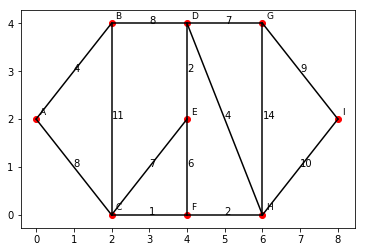

In [59]:
Lp=[(0,2),(2,4),(2,0),(4,4),(4,2),(4,0),(6,4),(6,0),(8,2)]
types = ['A','B','C','D','E','F','G','H','I']
x_coords = [0,2,2,4,4,4,6,6,8]
y_coords = [2,4,0,4,2,0,4,0,2]
Liste=[(0,1,4),(0,2,8),(1,2,11),(1,3,8),(2,4,7),(2,5,1),(3,4,2),(3,6,7),(3,7,4),(4,5,6),(5,7,2),(6,7,14),(6,8,9),(7,8,10)]#triplets (dep,arr,poids)
for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, color='red')
    plt.text(x+.1, y+.1, type, fontsize=9)
for elt in Liste:
    i,j,val=elt
    plt.plot([Lp[i][0],Lp[j][0]],[Lp[i][1],Lp[j][1]],'k')
    plt.text((Lp[i][0]+Lp[j][0])/2.,(Lp[i][1]+Lp[j][1])/2.,str(val))
plt.show()

### Tableau des distances à partir de Liste
* Liste : triplets - sans répétition - (origine,destination,distance)
* Dist : $Dist[i][j]=distance(i,j)$
* $N$ : nombre d'arêtes.

In [60]:
def tab_dist(L):
    N=max([max(L[i][0],L[i][1]) for i in range(len(Liste))])+1
    Dist=[[float('inf') for i in range(N)] for j in range(N)]#float('nan') ou -1 au lieu de l'infini
    for elt in L:
        i,j,val=elt
        Dist[i][j],Dist[j][i]=val,val
    return Dist
Disttest=tab_dist(Liste)
Disttest

[[inf, 4, 8, inf, inf, inf, inf, inf, inf],
 [4, inf, 11, 8, inf, inf, inf, inf, inf],
 [8, 11, inf, inf, 7, 1, inf, inf, inf],
 [inf, 8, inf, inf, 2, inf, 7, 4, inf],
 [inf, inf, 7, 2, inf, 6, inf, inf, inf],
 [inf, inf, 1, inf, 6, inf, inf, 2, inf],
 [inf, inf, inf, 7, inf, inf, inf, 14, 9],
 [inf, inf, inf, 4, inf, 2, 14, inf, 10],
 [inf, inf, inf, inf, inf, inf, 9, 10, inf]]

### Notations
* On choisit un sommet de départ $x_0$    
$\rightarrow$ éventuellement fictif et relié à tous les autres sommets    
$\rightarrow$ on suppose que tout sommet est relié à $x_0$ (connexité par arcs)
* Si  $x\in S$, on note 
$$\delta(x)\; :\; \text{ longueur du plus court chemin de }x_0\text{ a }x$$

## Algorithme de DIJKSTRA
* On construit récursivement une suite $(L_n)$ où, pour $1\leq n\leq N$ :
    * $L_n=[x_0,\dots,x_{n-1}]$ est une liste de $n$ sommets ($\leftrightarrow$ ensemble).
    * Ce sont les $n$ sommets les plus proches de $x_0$
    * $\delta(x_{n-1})$ est réalisé pour un chemin constitué de points de $L_n$.

### Initialisation
* $L_1=[x_0]$

### Hérédité
Pour $1\leq n \leq N-1$, on suppose $L_n=[x_0,\dots,x_{n-1}]$ construite.
* On choisit $x_n\in S\setminus L_n$ minimisant 
$$ \Delta=\min\limits_{\substack{(x,y)\in A^2\\ x\in S\setminus L_n \\ y\in L_n }} \delta(y)+{\rm d}(x,y)$$  
$\rightarrow$ Plusieurs $y\in L_n$ peuvent convenir    
$\rightarrow$ Vérifier $\Delta=\delta(y)+{\rm d}(x,y)$
* On peut poser $L_{n+1}=[x_0,\dots,x_{n-1},x_n]$
* On en profite pour mémoriser le chemin obtenu en concaténant :
    * Un chemin réalisant $\delta(y)$ dans $L_n$ (mémorisé)
    * L'arête $(x,y)$

### Principe simple (de Bellman)
* Si un $\gamma=(x_0,x_1,\dots, x_m,x)$ est un plus court chemin entre $x_0$ et $x$
* Alors $\forall i \in [\! | 1, m |\! ]$, $(x_0,\dots ,x_i)$ est encore un plus court chemin entre $x_0$ et $x_i$
* Sinon, un plus court chemin entre $x_0$ et $x_i$ ...
* Complété par $(x_{i+1},\dots , x_m,x)$ serait ...
* Plus court que $\gamma$ !

### Preuve
* On suppose que 
    * $L_n$ est bien constitué des $n$ sommets les plus proches de $x_0$
    * et que le plus court chemin entre $x_0$ et un point $y'$ de $L_n$ se fait dans $L_n$.
* On fixe $x\in S\setminus L_n$ et $y\in L_n$ convenables.

1. On montre que $\delta(x)= \Delta$.
2. On montre que $x'\in S\setminus L_n$ n'est pas plus proche de $x_0$ que $x$.

* Preuve de $\delta(x)= \Delta$.
    * $\Delta$ est la somme de la longueur du plus court chemin de $x_0$ à $y$ et de la longueur du chemin de $y$ à $x$    
    $\rightarrow$ C'est la longueur d'un chemin de $x_0$ à $x$    
    $\rightarrow$ $\delta(x)\leq \Delta$
    * Soit $\gamma=(x_0,y_1,\dots, y_m,x)$ le plus court chemin de $x_0$ à $x$
    * $(x_0,y_1\dots,y_m)$ est strictement plus court que $\gamma$
    * Si l'un des $y_i$ (disons $y_k$) n'appartient pas à $L_n$
    * alors $\delta(y_{k-1})+{\rm d}(y_{k-1},y_k)<\delta(x)\leq \Delta$
    * Contradiction avec la définition de $\Delta$ : $y_k\in L_n$
    * Par définition de $\Delta$ encore : $\delta(x) \geq \Delta$

* Soit $x'\in S\setminus L_n$ strictement plus proche de $x_0$ que $x$.
    * Comme précédemment, il existe $\gamma'=(x_0,\dots, y_k)$ 
    * avec $(x_0,y_1,\dots ,y_{k-1})\in (L_n)^{k}$ et $y_k\in S\setminus L_n$
    * éventuellement $y_k=x'$
    * donc $\gamma'$ de longueur strictement inférieure à $\delta(x)$
    * Contradiction avec le définition de $\Delta$.

In [52]:
def courts_chemins(Dist,x0):
    N=len(Dist)
    valmax=N*(max([max([Dist[i][j] for i in range(N)])for j in range(N)])+1)
    L=[x0]
    chemin=[[] for i in range(N)]
    chemin[x0]=[x0,0]
    while(len(L)<N):
        val=valmax
        for i in range(N):
            if i in L:#déjà traités
                diopt=chemin[i][-1]
                for j in range(N):
                    if (not j in L) and Dist[i][j]!=float('inf'):#reliés non traités
                        prov=diopt+Dist[i][j]
                        if prov<val:
                            y,x,val=i,j,prov
        chemin[x]=chemin[y][:-1]+[x]+[val]
        L.append(x)
    return chemin
                        
courts_chemins(Disttest,0)                   

[[0, 0],
 [0, 1, 4],
 [0, 2, 8],
 [0, 1, 3, 12],
 [0, 1, 3, 4, 14],
 [0, 2, 5, 9],
 [0, 1, 3, 6, 19],
 [0, 2, 5, 7, 11],
 [0, 2, 5, 7, 8, 21]]

$\rightarrow$ On obtient <b>tous</b> les plus courts chemins de $x_0$ aux autres points du graphe.

## Algorithme de BELLMAN-FORD
* Principe de Bellman s'applique    
$\rightarrow$ programmation dynamique
* Notation $D_{k,x}$    
$\rightarrow$ distance minimale entre la source $x_0$ et $x$   
$\rightarrow$ empruntant <i>au plus</i> $k \in [\!| 1, N |\! ]$ sommets    
$\rightarrow$ <i>Ex :</i>$D_{1,x_0}=0$ et $D_{1,x}=+\infty$ si $x\neq x_0$.
* Relation de récurrence :
$$
D_{k,x}=\begin{cases}
0&\text{ si }x=x_0\\
+\infty&\text{ si }x\neq x_0\text{ et }k=1\\
\min \left(D(k-1,x),\min\limits_{y\in E}( D(k-1,y)+d(x,y)\right)
\end{cases}
$$


In [75]:
def Bellman_Ford(Dist,x0):
    N=len(Dist)
    L=[ [ float("inf") for j in range(N) ] for i in range(N)]
    L[0][x0]=0
    for k in range(1,N):
        for j in range(N):
            L[k][j]=min([L[k-1][j],min([L[k-1][v]+Dist[v][j] for v in range(N)])])
    return L

Bellman_Ford(Disttest,0)

[[0, inf, inf, inf, inf, inf, inf, inf, inf],
 [0, 4, 8, inf, inf, inf, inf, inf, inf],
 [0, 4, 8, 12, 15, 9, inf, inf, inf],
 [0, 4, 8, 12, 14, 9, 19, 11, inf],
 [0, 4, 8, 12, 14, 9, 19, 11, 21],
 [0, 4, 8, 12, 14, 9, 19, 11, 21],
 [0, 4, 8, 12, 14, 9, 19, 11, 21],
 [0, 4, 8, 12, 14, 9, 19, 11, 21],
 [0, 4, 8, 12, 14, 9, 19, 11, 21]]

In [ ]:
#Avec les chemins


In [74]:
def Bellman_Ford2(Dist,x0):
    N=len(Dist)
    L=[ [ [float("inf")] for j in range(N) ] for i in range(N)]
    L[0][x0]=[x0,0]
    for k in range(1,N):
        for j in range(N):
            mini=L[k-1][j][-1]
            b=j
            for v in range(N):#On repasse par j - évitable
                if v!=j and L[k-1][v][-1]+Dist[v][j]<mini:#Evité !
                    b=v
                    mini=L[k-1][v][-1]+Dist[v][j]
            if b==j:
                L[k][j]=L[k-1][j]+[]
            else:
                L[k][j]=L[k-1][b][:-1]+[j]+[mini]
    return L

Bellman_Ford2(Disttest,0)[-1]

[[0, 0],
 [0, 1, 4],
 [0, 2, 8],
 [0, 1, 3, 12],
 [0, 1, 3, 4, 14],
 [0, 2, 5, 9],
 [0, 1, 3, 6, 19],
 [0, 2, 5, 7, 11],
 [0, 2, 5, 7, 8, 21]]

#### Généralisations :
* Arcs de poids négatifs.
* Nécessité de limiter les tours de boucle ($\neq N$)
* Possibilité d'oublier les lignes précédentes
* Floyd Warshall    
$\rightarrow$ plus cours chemin entre tous les couples   
$\rightarrow$ même principe dynamique que rendu monnaie

#### Applications :
* Routage RIP
* Programmation linéaire

## <center> BACKTRACKING </center>

## Solveur de Sudoku
* Glouton
* Backtracking

### Sudoku
* Grille $9\times 9$ $\rightarrow$ 81 cases
* 9 sous-grilles $3\times 3$ $\rightarrow$ régions de 9 cases
* Règle : une seule occurence de chaque nombre de $[\! | 1,9|\! ]$
    * par ligne
    * par colonne
    * Par région

### Jeu 
* Grille préremplie    
$\rightarrow$ Par quelques nombres    
$\rightarrow$ Existence de solution

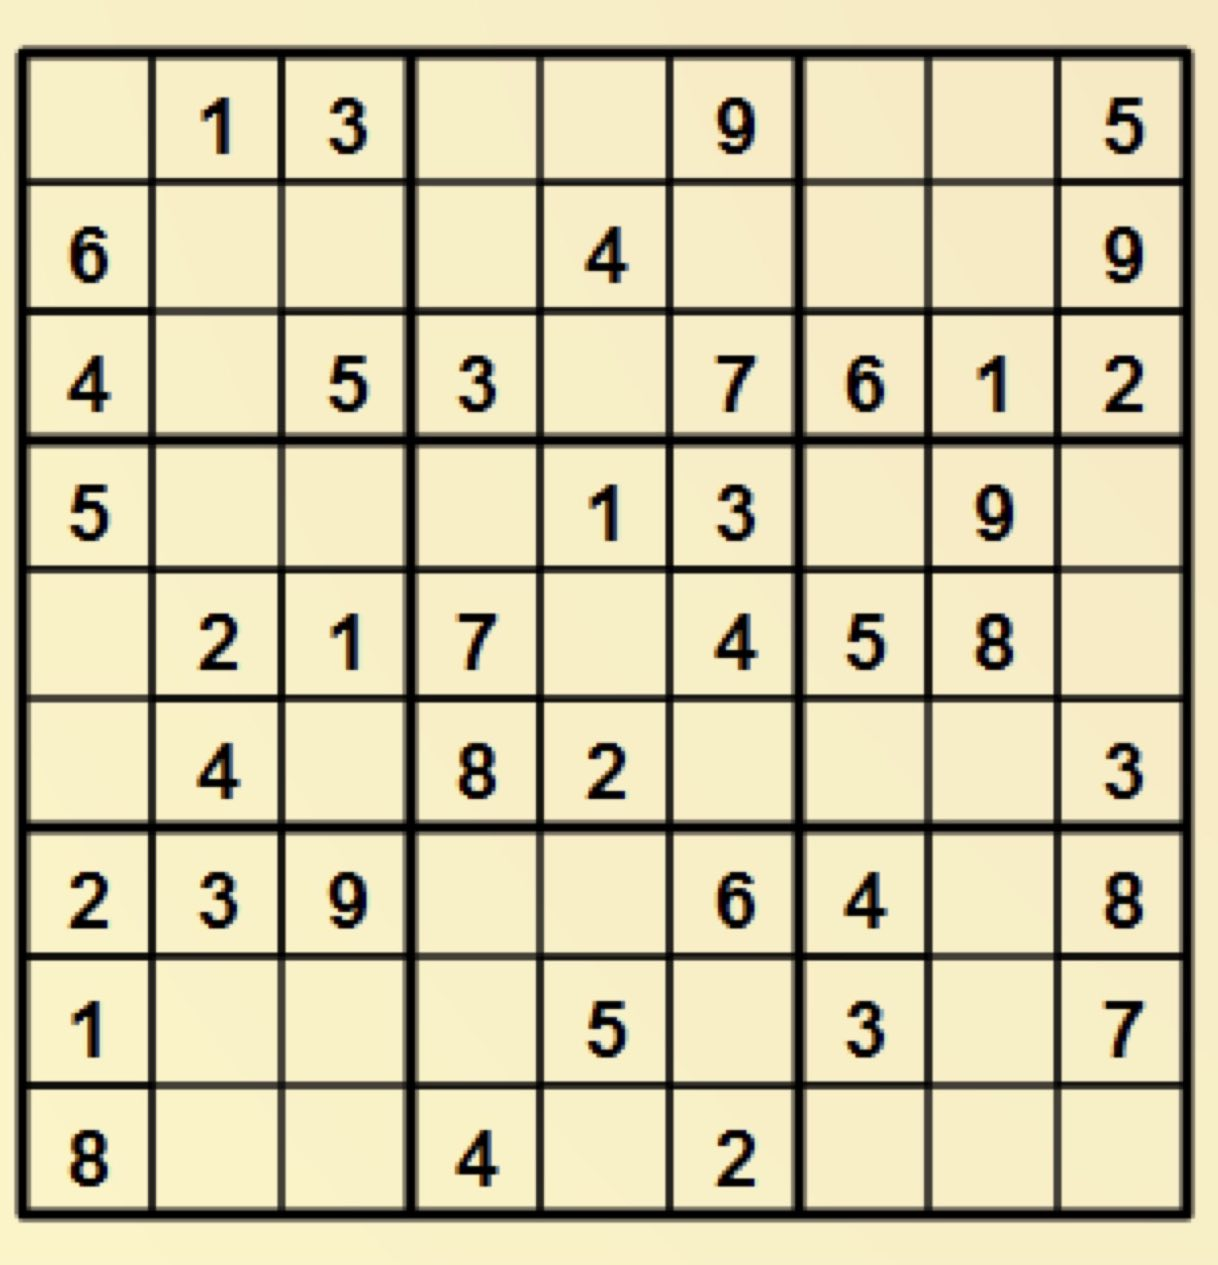

In [1]:
from IPython.display import Image,display
i = Image(filename='sudoku.jpg')
display(i)

### Modélisation
* Liste de 9 listes de 9 nombres
* Case à compléter    
$\rightarrow$ 0

In [ ]:
M=[[0,1,3,0,0,9,0,0,5],[6,0,0,0,4,0,0,0,9],\
   [4,0,5,3,0,7,6,1,2],[5,0,0,0,1,3,0,9,0],\
   [0,2,1,7,0,4,5,8,0],[0,4,0,8,2,0,0,0,3],\
   [2,2,9,0,0,6,4,0,8],[1,0,0,0,5,0,3,0,7],\
   [8,0,0,4,0,2,0,0,0]]

### Test de position
* $\verb"compatible_region(num,i,j,M)"$
* $\verb"compatible_ligne(num,i,j,M)"$
* $\verb"compatible_colonne(num,i,j,M)"$    
$\rightarrow$ $\verb"compatible(num,i,j,M)"$ 

In [ ]:
# A vous

In [ ]:
# A vous

In [ ]:
# A vous

In [ ]:
def compatibleligne(i,num,M):
    for j in range(9):
        if M[i][j]==num:
            return False
    return True

In [ ]:
def compatiblecolonne(j,num,M):
    for i in range(9):
        if M[i][j]==num:
            return False
    return True

In [ ]:
def compatibleregion(num,i,j,M):
    ir=(i//3)*3
    jr=(j//3)*3
    for k in range(3):
        for l in range(3):
            if M[ir+k][jr+l]==num:
                return False
    return True

In [ ]:
def compatible(num,i,j,M):
    return compatibleregion(num,i,j,M) and \
    compatibleligne(i,num,M) and compatiblecolonne(j,num,M)

### Backtracking
* Parcours lignes/colonnes
* Cases vides 
* Heuristique gloutonne :    
$\rightarrow$ On remplit par les nombres de $[\! | 1, 9|\! ]$ (dans l'ordre)    
$\rightarrow$ Si possible !    
$\rightarrow$ On continue...    
$\rightarrow$ Jusqu'à :
    * Grille terminée
    * Impossibilité
* On revient alors sur le dernier choix    
$\rightarrow$ backtracking    
$\rightarrow$ Retour sur ses pas

#### Fonction utilitaire

In [33]:
def recherchecase(M):
    for i in range(9):
        for j in range(9):
            if M[i][j]==0:
                return (i,j)
    return (float('nan'),float('nan'))

$\rightarrow$ Que fait-elle ? A quoi sert-elle ?

In [ ]:
# Foncton finale
def solveur(M):
    i,j=recherchecase(M)
    if i!=i:
        return True
    else:
        for k in range(1,10):
            if compatible(k,i,j,M):
                M[i][j]=k
                nouveau=solveur(M)
                if nouveau:
                    return nouveau
        M[i][j]=0
        return False

## Labyrinthe
* Glouton
* Backtracking
* Piles

## A-Etoile
* Glouton
* Alternative au backtracking    
$\rightarrow$ Programmation dynamique
* BFS (comme Dijsktra, auquel il faut ajouter une file de priorité)    
$\rightarrow$ Parler de DFS ?

## <center>ALGORITHMES GENETIQUES</center>

In [ ]:
#Voyageur de commerce

## <center>COLONIES DE FOURMIS - ESSAIMS ABEILLES</center>

In [ ]:
#Voyageur de commerce

## <center> OPTIMISATION <center>

In [ ]:
#Multiplicateurs de Lagrange
#Gradient conjugué
#Type Aetoile (score/pénalité)
#Programmation dynamique
#Recuit simulé